In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation
from tensorflow.keras.utils import normalize, to_categorical

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

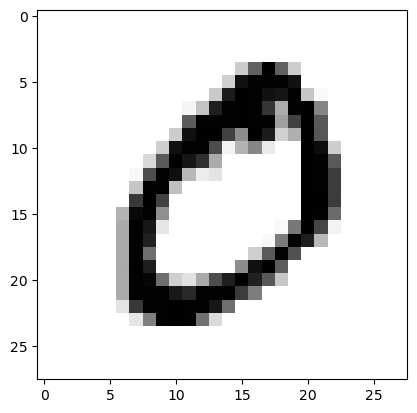

In [3]:
plt.imshow(X_train[1], cmap = plt.cm.binary)
plt.show()

In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

#model.summary()

Metal device set to: Apple M1


2022-11-05 02:05:06.382516: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-05 02:05:06.382802: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'mse'])

In [8]:
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose = 1,
    shuffle = True
)

Epoch 1/20


2022-11-05 02:05:09.714607: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-05 02:05:09.874884: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - ETA: 0s - loss: 0.4299 - accuracy: 0.8686 - mse: 0.0191

2022-11-05 02:05:27.458683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - 19s 10ms/step - loss: 0.4299 - accuracy: 0.8686 - mse: 0.0191 - val_loss: 0.1503 - val_accuracy: 0.9570 - val_mse: 0.0067
Epoch 2/20
1688/1688 [==============================] - 17s 10ms/step - loss: 0.2098 - accuracy: 0.9376 - mse: 0.0095 - val_loss: 0.1181 - val_accuracy: 0.9647 - val_mse: 0.0054
Epoch 3/20
1688/1688 [==============================] - 16s 10ms/step - loss: 0.1686 - accuracy: 0.9487 - mse: 0.0077 - val_loss: 0.1009 - val_accuracy: 0.9702 - val_mse: 0.0045
Epoch 4/20
1688/1688 [==============================] - 17s 10ms/step - loss: 0.1443 - accuracy: 0.9548 - mse: 0.0067 - val_loss: 0.0952 - val_accuracy: 0.9722 - val_mse: 0.0042
Epoch 5/20
1688/1688 [==============================] - 14s 8ms/step - loss: 0.1291 - accuracy: 0.9591 - mse: 0.0061 - val_loss: 0.0873 - val_accuracy: 0.9743 - val_mse: 0.0040
Epoch 6/20
1688/1688 [==============================] - 14s 8ms/step - loss: 0.1177 - accuracy: 0.9629 - mse: 0.0056 - val

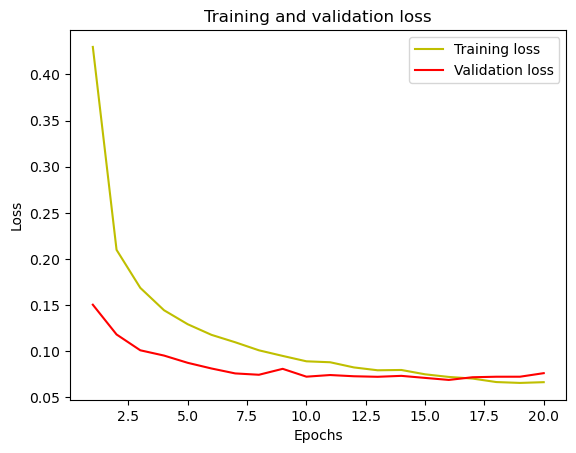

In [9]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

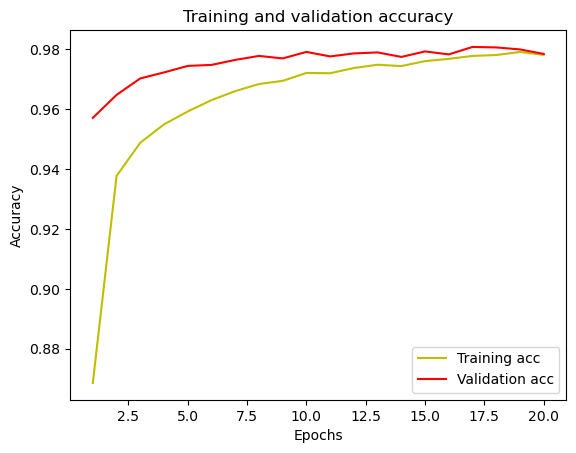

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0893 - accuracy: 0.9737 - mse: 0.0040


[0.0892622321844101, 0.9737000465393066, 0.004006327595561743]

In [12]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

In [13]:
img = load_img('../1.png')
digit = img_to_array(img)

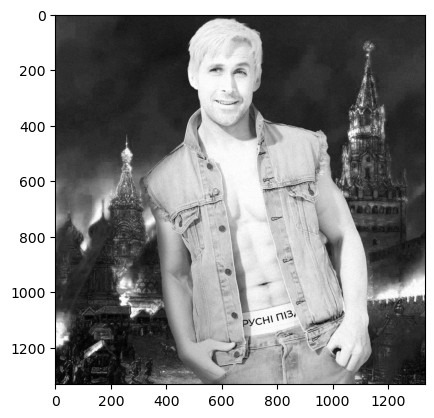

In [14]:
digit = np.abs(digit - 255)
plt.imshow(digit[:, :, 0], cmap = plt.cm.binary)
digit = normalize(digit, axis =1)

In [15]:
model.predict([[digit[:, :, 0]]]).argmax()

ValueError: in user code:

    File "/Users/tylerdurden/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "/Users/tylerdurden/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/tylerdurden/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/tylerdurden/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 1983, in predict_step
        return self(x, training=False)
    File "/Users/tylerdurden/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/tylerdurden/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 28, 28), found shape=(None, 1332)
